## Hafsa Nasir 24394 Maira Munir 24481


**1) Understanding the Data:**

The data seems to be gathered from the perspective of the hotel business. The data shows information about customer reservations that can help the business understand booking trends. The data shows details like when do people make a booking, how long they stay, how often they cancel their bookings, how long they wait for the availability of a room and how they make a booking. We can see the type of room they choose, the type of customer they are and how many families with children prefer to stay in the hotel. This data if used correctly will help the hotel plan better and make decisions to improve customer satistfaction and to boost profits.

**Business Queries:**
1) On average, how likely are people to cancel their booking depending on the way they booked ie Market Segment and if they deposited money or not.

2) What is the trend across multiple countries of families that come to vacation in the hotels and peak time.

3) On average, which days of the week do the customers prefer to stay based on whether they have children or not.

**Columns not contributing value to the analysis:**

arrival_date_week_number, distribution_channel, meals, agent, company, booking_changes

**Dimensions: (Categorical)**

hotel: Type of hotel

arrival_date_year, arrival_date_month, arrival_date_day_of_month

meal

country

market segment

is_repeated_guest

reserved_room_type

deposit_type

customer_type

reservation_status, reservation_status_date

agent, company

**Facts:(measurable quantities)**

lead_time

adr (average daily rate)

stays_in_weekend_nights

stays_in_week_nights

adults, children, babies

previous_cancellations, previous_bookings_not_cancelled

booking_changes

total_of_special_requests

**Dimensions and facts important from a business perspective:**

**FACTS:**

1) adr (average daily rate): it important as it indicates how much revenue is the hotel earning per room which will help evaluate the effectiveness of pricing strategies.

2) Lead_time: this is the number of days between booking and arrival, provides insights into customer behavior. the hotel can learn whether they need last-minute promotions before vacations or early bird discounts to gather more customers.

3) Number of cancellations: it is essential for the hotel to track cancellations so that they can identify patterns that may lead to revenue loss. Management can also try to figure out the reasons behind booking cancellations.

**DIMENSIONS:**

1) hotel(type of hotel): it is important to analyze trends for each hotel type to better the pricing strategies or marketing etc

2) arrival date: it helps the hotels to track peak periods so they can adjust their staffing, marketing and pricing etc

3) customer type: helps the business to understand the customer requirements and behavior according to their type (e.g, transient, group or regular).

4) reserved room type: helps hotel to understand which specific rooms are more in demand allowing better inventory management and pricing optimization.

5) Deposit type: this helps the business understand whether guests are more likely to cancel bookings based on deposit conditions(e.g, non refund, no deposit etc) so they can accept guests based on the deposit type.

6) market segment: understanding how the customer made their booking (e.g, direct, through agents or a travel company etc). It is important to know which channels are bringing more customers so the hotel can maybe form partnerships with them or for better pricing strategies etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
hotel_data= pd.read_csv("hotel_bookings_dirty.csv")

In [ ]:
hotel_data.shape

(119390, 32)

In [ ]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.00,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.00,0.0,1.0,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,NaN,30.0,2.0,5.0,2.0,...,No Deposit,394.0,NaN,NaN,Transient,96.14,0.0,0.0,Check-Out,06/09/2017
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,NaN,...,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,07/09/2017
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,9.0,NaN,NaN,Transient,157.71,0.0,4.0,Check-Out,07/09/2017
119388,City Hotel,0.0,NaN,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,89.0,NaN,NaN,Transient,104.40,0.0,0.0,Check-Out,07/09/2017


We find how many missing values there are in each column.

In [ ]:
hotel_data.isnull().sum()

,0
hotel,10
is_canceled,12
lead_time,8372
arrival_date_year,14
arrival_date_month,11
arrival_date_week_number,89545
arrival_date_day_of_month,16
stays_in_weekend_nights,13
stays_in_week_nights,15
adults,11953


In [ ]:
missing_data=hotel_data.isnull().sum()

In [ ]:
missing_data/len(hotel_data)*100

,0
hotel,0.008376
is_canceled,0.010051
lead_time,7.012313
arrival_date_year,0.011726
arrival_date_month,0.009214
arrival_date_week_number,75.002094
arrival_date_day_of_month,0.013401
stays_in_weekend_nights,0.010889
stays_in_week_nights,0.012564
adults,10.011726


<Axes: >

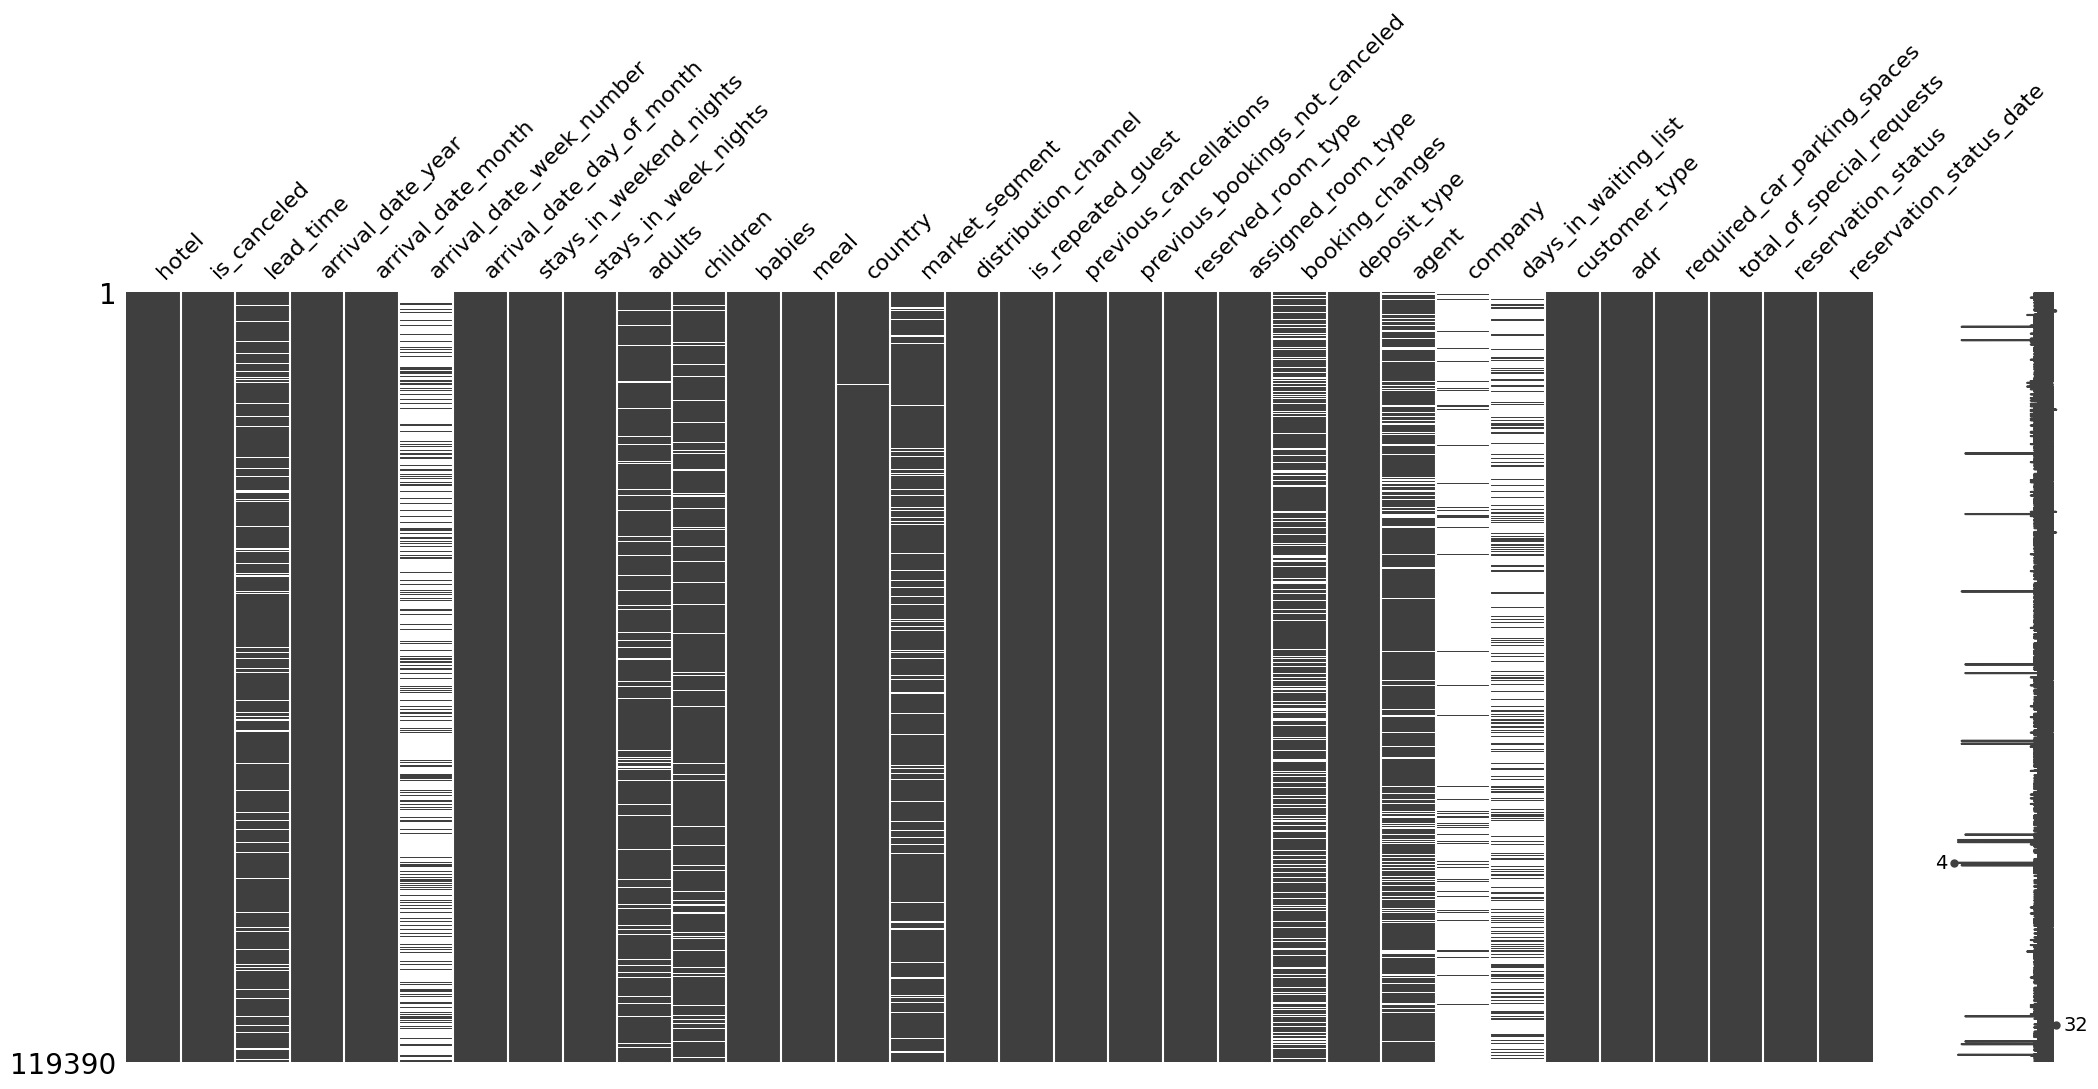

In [ ]:
mano.matrix(hotel_data)


Based on the above matrix, we see that none of the columns have exactly similar missing value pattern so this cannot be MNAR. However some of the values are clumped in some areas such as lead_time, adults, children, country, booking_changes, agent etc which may suggest MAR however for the rest it can be MCAR as they are completely random hence we will be imputing values.

# **Dropping columns with more than 20% missing values.**


Removing duplicates. By doing this our original data set with 119390 rows now became 110082 rows.

In [ ]:
hotel_data=hotel_data.drop_duplicates()

**arrival_date_week_number**

In [ ]:
hotel_data=hotel_data.drop(columns=['arrival_date_week_number'])

**company**

In [ ]:
hotel_data=hotel_data.drop(columns=['company'])

**days_in_waiting_list**

In [ ]:
hotel_data=hotel_data.drop(columns=['days_in_waiting_list'])

In [ ]:
hotel_data=hotel_data.drop(columns=['booking_changes'])

In [ ]:
hotel_data=hotel_data.drop(columns=['meal'])

In [ ]:
hotel_data=hotel_data.drop(columns=['agent'])

In [ ]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,1.0,0.0,0.0,2.0,0.0,...,0.0,C,C,No Deposit,Transient,0.00,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,1.0,0.0,0.0,2.0,0.0,...,0.0,C,C,No Deposit,Transient,0.00,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,1.0,0.0,1.0,1.0,0.0,...,0.0,A,C,No Deposit,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,1.0,0.0,1.0,1.0,0.0,...,0.0,A,NaN,No Deposit,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,1.0,0.0,2.0,2.0,0.0,...,0.0,A,A,No Deposit,Transient,98.00,0.0,1.0,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,30.0,2.0,5.0,2.0,0.0,...,0.0,A,A,No Deposit,Transient,96.14,0.0,0.0,Check-Out,06/09/2017
119386,City Hotel,0.0,102.0,2017.0,August,31.0,2.0,5.0,NaN,0.0,...,0.0,E,E,No Deposit,Transient,225.43,0.0,2.0,Check-Out,07/09/2017
119387,City Hotel,0.0,34.0,2017.0,August,31.0,2.0,5.0,2.0,0.0,...,0.0,D,D,No Deposit,Transient,157.71,0.0,4.0,Check-Out,07/09/2017
119388,City Hotel,0.0,NaN,2017.0,August,31.0,2.0,5.0,2.0,0.0,...,0.0,A,A,No Deposit,Transient,104.40,0.0,0.0,Check-Out,07/09/2017


# 2) **Descriptive Statistics**

In [ ]:
#numerical columns
numericals_analysis = hotel_data[['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'previous_bookings_not_canceled']]

#descriptive stats
descriptive_stats = numericals_analysis.describe()
print("Descriptive Statistics:\n",descriptive_stats)

#modes
mode = numericals_analysis.mode().loc[0]
print("\nmode for each column:\n", mode)

#medians
medians = numericals_analysis.median()
print("\nMedian for each column:\n", medians)

Descriptive Statistics:
                  adr      lead_time  stays_in_week_nights  \
count  110069.000000  101826.000000         110067.000000   
mean      102.884942      96.581561              2.532848   
std        51.772273     101.281247              1.952319   
min        -6.380000       0.000000              0.000000   
25%        70.000000      16.000000              1.000000   
50%        95.000000      63.000000              2.000000   
75%       127.800000     150.000000              3.000000   
max      5400.000000     737.000000             50.000000   

       stays_in_weekend_nights  previous_cancellations  \
count            110069.000000           110069.000000   
mean                  0.953148                0.068221   
std                   1.007970                0.727940   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   1.000000                0.000000   
75%                

**Visualization**

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


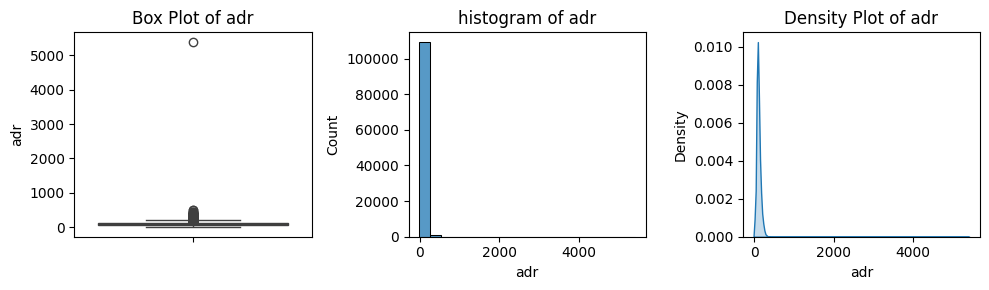

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


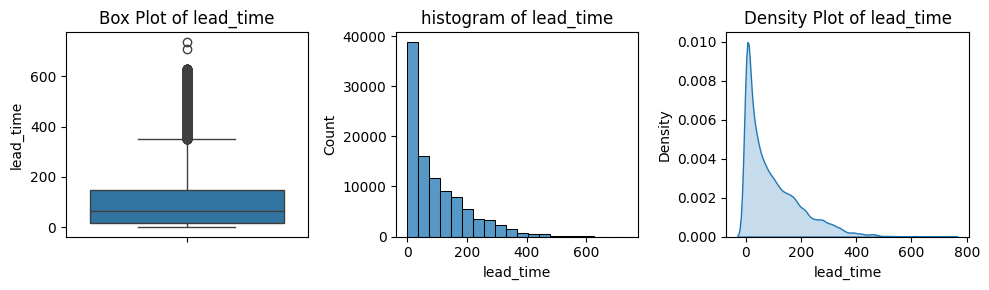

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


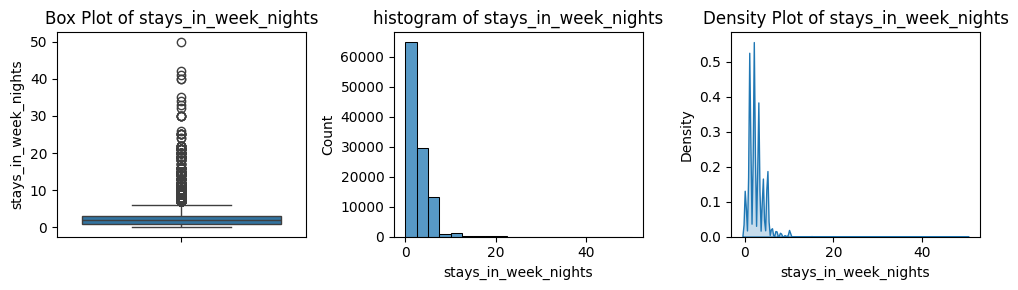

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


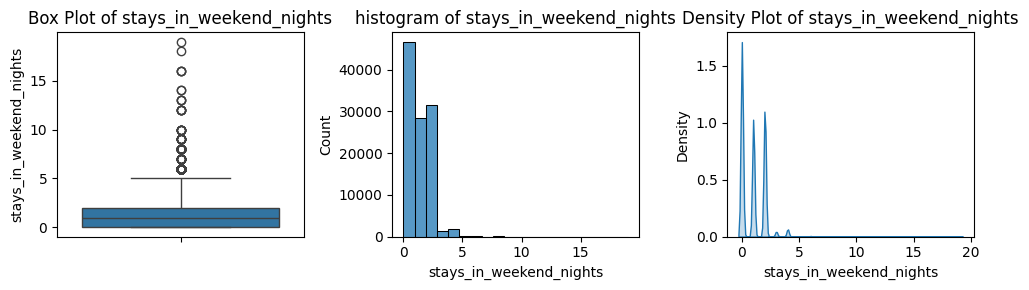

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


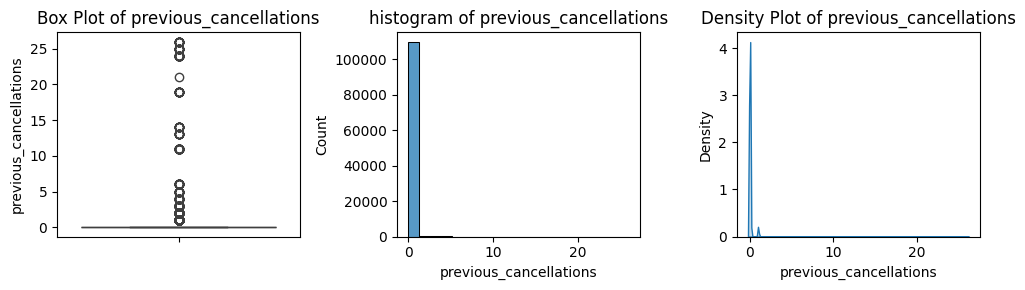

<ipython-input-20-9e1c4538bdba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_data[column], shade=True)


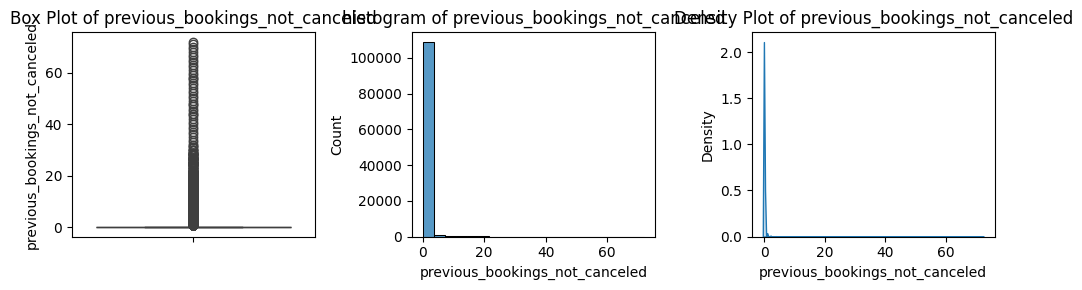

In [ ]:
for column in numericals_analysis.columns:
    plot.figure(figsize=(10, 3))

    # Box plot
    plot.subplot(1, 3, 1)
    sns.boxplot(y=hotel_data[column])
    plot.title(f'Box Plot of {column}')

    # Density plot
    plot.subplot(1, 3, 3)
    sns.kdeplot(hotel_data[column], shade=True)
    plot.title(f'Density Plot of {column}')

    #histogram
    plot.subplot(1,3,2)
    sns.histplot(hotel_data[column],bins=20, kde=False)
    plot.title(f'histogram of {column}')

    plot.tight_layout()
    plot.show()

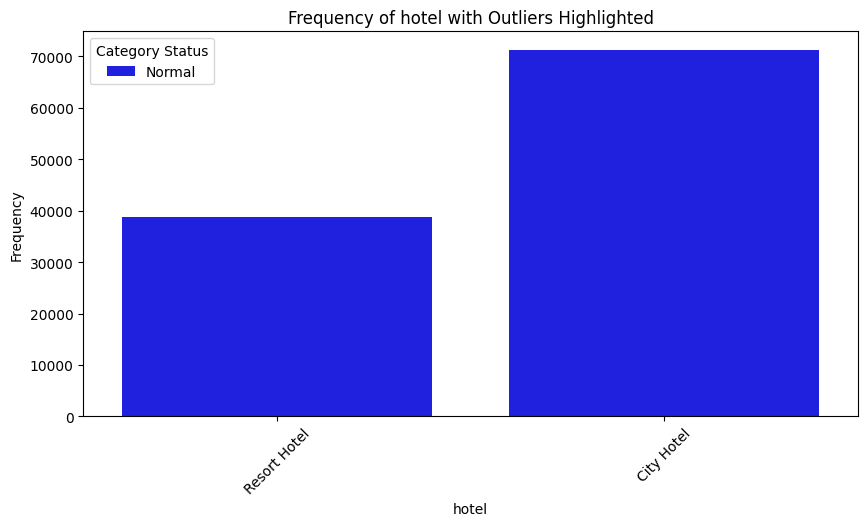

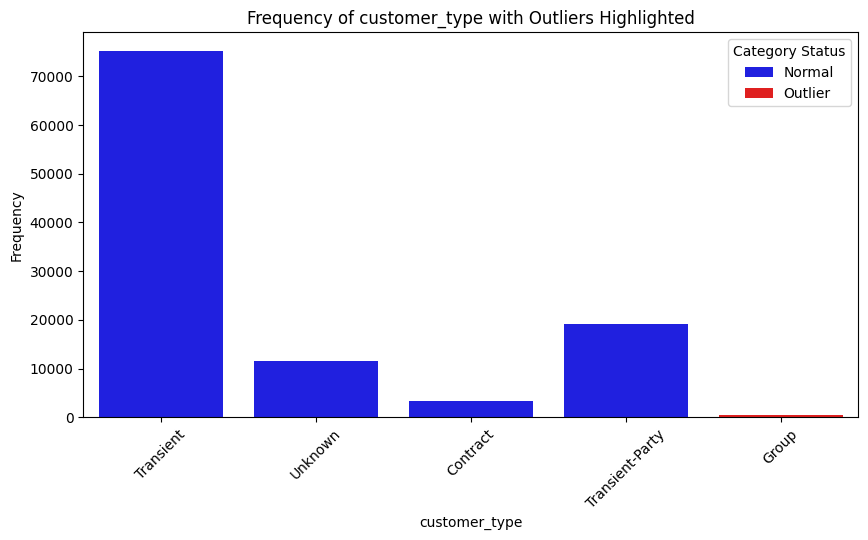

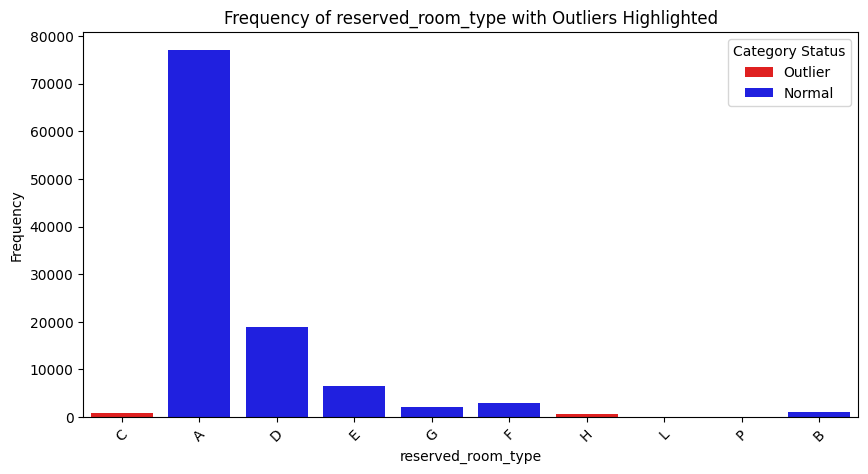

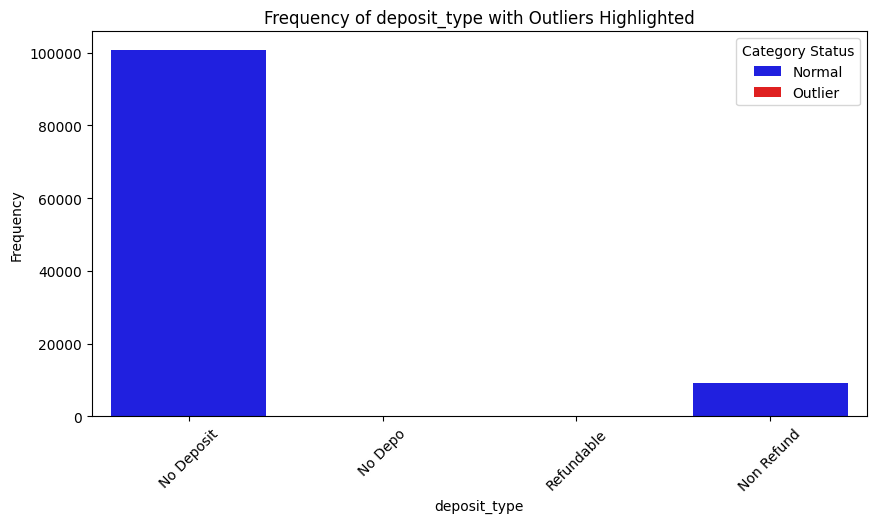

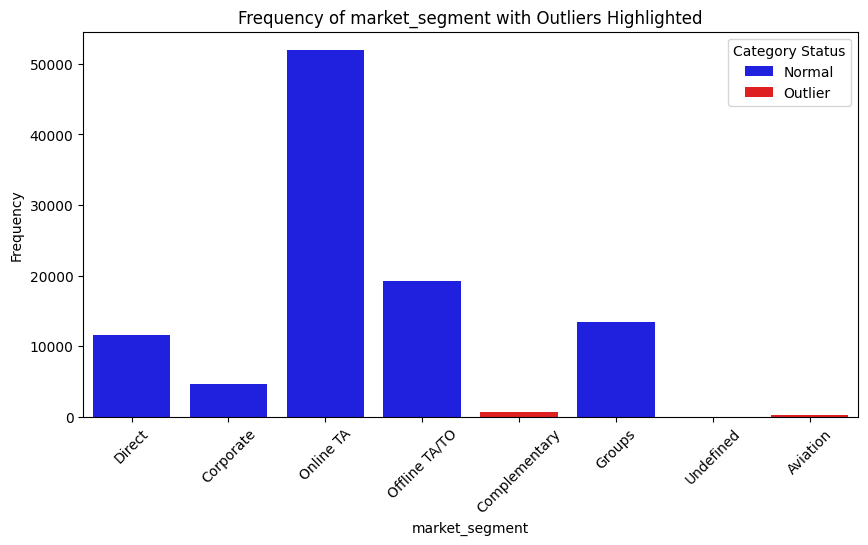

In [ ]:
categorical_columns = ['hotel',  'customer_type', 'reserved_room_type', 'deposit_type', 'market_segment']
# Generate frequency tables and bar plots for each categorical column
outlier_threshold = 0.01 * len(hotel_data)
for column in categorical_columns:
    # Frequency table
    freq_table = hotel_data[column].value_counts()

    # Identify outliers
    outliers = freq_table[freq_table < outlier_threshold].index.tolist()

    # Create a new column in the DataFrame to indicate if the category is an outlier
    hotel_data['is_outlier'] = hotel_data[column].apply(lambda x: 'Outlier' if x in outliers else 'Normal')

    # Plotting
    plot.figure(figsize=(10, 5))
    sns.countplot(data=hotel_data, x=column, hue='is_outlier', palette={'Outlier': 'red', 'Normal': 'blue'})
    plot.title(f'Frequency of {column} with Outliers Highlighted')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.xticks(rotation=45)
    plot.legend(title='Category Status')
    plot.show()

In [ ]:
outlier_threshold = 0.01 * len(hotel_data)

outlier_info = {}
for column in categorical_columns:
    freq_table = hotel_data[column].value_counts()
    outliers = freq_table[freq_table < outlier_threshold]
    outlier_info[column] = outliers.index.tolist()

    if outliers.any():
        print(f"\nOutliers in {column}:")
        print(outliers)


Outliers in customer_type:
customer_type
Group    530
Name: count, dtype: int64

Outliers in reserved_room_type:
reserved_room_type
C    931
H    601
P     12
L      6
Name: count, dtype: int64

Outliers in deposit_type:
deposit_type
Refundable    151
No Depo         1
Name: count, dtype: int64

Outliers in market_segment:
market_segment
Complementary    687
Aviation         212
Undefined          2
Name: count, dtype: int64



# **3) Missing Values**

Missing Values for is_cancelled and reservation_status. Since both are telling the same thing we can use it to fill the reservation_status column and drop the is_cancelled as values are being repeated.

In [ ]:
hotel_data.loc[hotel_data['is_canceled']==1,'reservation_status']='Canceled'
hotel_data.loc[hotel_data['is_canceled']==0,'reservation_status']='Check-Out'

In [ ]:
hotel_data[['reservation_status_date','reservation_status']].isnull().sum()

,0
reservation_status_date,15
reservation_status,10


In [ ]:
hotel_data=hotel_data.drop(columns=['is_canceled'])

For the type of hotel we use the mode as only 0.009% of values are missing.
we use mode for room types, cutomer type and deposit type as well since very small percentage of values are missing so replacing them with mode will not significantly impact overall distribution of data

In [ ]:
from sklearn.impute import SimpleImputer

mode_imputation = SimpleImputer(strategy='most_frequent')

#take only columns where mean imputation matters, i.e., numerical columns
hotel_data[['hotel','deposit_type','customer_type','country','arrival_date_month','assigned_room_type','reserved_room_type']] = mode_imputation.fit_transform(hotel_data[['hotel','deposit_type','customer_type','country','arrival_date_month','assigned_room_type','reserved_room_type']])

In [ ]:
hotel_data[['hotel','deposit_type','customer_type','country','arrival_date_month','assigned_room_type','reserved_room_type']].isnull().sum()

,0
hotel,0
deposit_type,0
customer_type,0
country,0
arrival_date_month,0
assigned_room_type,0
reserved_room_type,0


Replaced null values with 0 as less missing values and didn't really affect distribution.

In [ ]:
hotel_data[['stays_in_week_nights','stays_in_weekend_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled' ,'required_car_parking_spaces','total_of_special_requests']]=hotel_data[['stays_in_week_nights','stays_in_weekend_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled' ,'required_car_parking_spaces','total_of_special_requests']].fillna(0)

Here we fix the format of the date column as some of the entries were in "dd/mm/yyyy", "dd-mon-yyyy", "mm/dd/yyyy" format and also adding the missing values.

We first combine the arrival_date columns into one so that we can get the values for reservation_status_date for people who did not cancel. We get these values by adding the nights they spent into the arrival date.

But first we find missing values for all of the columns in arrival date by using woh beech wala method. After doing that, we get uska combined.

In [ ]:
hotel_data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].isnull().sum()

,0
arrival_date_year,14
arrival_date_month,0
arrival_date_day_of_month,16


In [ ]:
hotel_data[['arrival_date_year','arrival_date_day_of_month']]=hotel_data[['arrival_date_year','arrival_date_day_of_month']].interpolate(method='linear').astype(int)

In [ ]:
hotel_data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].isnull().sum()

,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0


In [ ]:
hotel_data.loc[:,'arrival_date']=hotel_data['arrival_date_year'].astype(str)+ '-' + hotel_data['arrival_date_month']+'-' + hotel_data['arrival_date_day_of_month'].astype(str)


In [ ]:
hotel_data.loc[:,'arrival_date']=hotel_data['arrival_date'].str.replace('.0', '')


In [ ]:
hotel_data.loc[:,'arrival_date'] = pd.to_datetime(hotel_data['arrival_date'], format='%Y-%B-%d', errors='coerce')


In [ ]:
hotel_data['arrival_date'].isnull().sum()

0

We will calculate the reservation_status_date for people who did not cancel by getting the days they spent and adding them to the arrival date.

In [ ]:
hotel_data.loc[:,'days_spent_in_hotel'] = pd.to_timedelta(hotel_data['stays_in_week_nights'].fillna(0).astype(int) + hotel_data['stays_in_weekend_nights'].fillna(0).astype(int), unit='D')

In [ ]:
hotel_data[['stays_in_week_nights','stays_in_weekend_nights']].isnull().sum()

,0
stays_in_week_nights,0
stays_in_weekend_nights,0


In [ ]:
hotel_data['reservation_status'] = hotel_data['reservation_status'].fillna('Check-Out')

In [ ]:
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'])
hotel_data.loc[hotel_data['reservation_status']=='Check-Out','check_out_date'] = hotel_data['arrival_date'] + hotel_data['days_spent_in_hotel']

In [ ]:
hotel_data.loc[hotel_data['reservation_status']=='Check-Out','check_out_date'].isnull().sum()

0

In [ ]:
hotel_data.loc[hotel_data['reservation_status']=='Check-Out','reservation_status_date']=hotel_data['check_out_date']

In [ ]:
hotel_data['reservation_status_date'].isnull().sum()

1

In [ ]:
hotel_data=hotel_data.drop(columns=['check_out_date'])

In [ ]:
hotel_data

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_spent_in_hotel
0,Resort Hotel,342.0,2015,July,1,0.0,0.0,2.0,0.0,0.0,...,C,No Deposit,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,2015-07-01,0 days
1,Resort Hotel,737.0,2015,July,1,0.0,0.0,2.0,0.0,0.0,...,C,No Deposit,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,2015-07-01,0 days
2,Resort Hotel,7.0,2015,July,1,0.0,1.0,1.0,0.0,0.0,...,C,No Deposit,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,2015-07-01,1 days
3,Resort Hotel,13.0,2015,July,1,0.0,1.0,1.0,0.0,0.0,...,A,No Deposit,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,2015-07-01,1 days
4,Resort Hotel,14.0,2015,July,1,0.0,2.0,2.0,0.0,0.0,...,A,No Deposit,Transient,98.00,0.0,1.0,Check-Out,2015-07-03 00:00:00,2015-07-01,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23.0,2017,August,30,2.0,5.0,2.0,0.0,0.0,...,A,No Deposit,Transient,96.14,0.0,0.0,Check-Out,2017-09-06 00:00:00,2017-08-30,7 days
119386,City Hotel,102.0,2017,August,31,2.0,5.0,NaN,0.0,0.0,...,E,No Deposit,Transient,225.43,0.0,2.0,Check-Out,2017-09-07 00:00:00,2017-08-31,7 days
119387,City Hotel,34.0,2017,August,31,2.0,5.0,2.0,0.0,0.0,...,D,No Deposit,Transient,157.71,0.0,4.0,Check-Out,2017-09-07 00:00:00,2017-08-31,7 days
119388,City Hotel,NaN,2017,August,31,2.0,5.0,2.0,0.0,0.0,...,A,No Deposit,Transient,104.40,0.0,0.0,Check-Out,2017-09-07 00:00:00,2017-08-31,7 days


In [ ]:
hotel_data.loc[hotel_data['reservation_status']=='Canceled',"reservation_status_date"] = pd.to_datetime(hotel_data["reservation_status_date"], errors='coerce')

In [ ]:
hotel_data["reservation_status_date"].isnull().sum()

1

In [ ]:
hotel_data.loc[hotel_data['reservation_status_date'].isnull(),['reservation_status_date','reservation_status']]

,reservation_status_date,reservation_status
70041,NaT,Canceled


In [ ]:
hotel_data=hotel_data.drop(index=70041)

**Handling missing values using KNN imputation**:

for these columns we will use KNN imputation as it helps maintain overall structure of data without using simple average or median.

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
hotel_data[['lead_time']]=knn_imputer.fit_transform(hotel_data[['lead_time']])


In [ ]:
hotel_data['lead_time'].isnull().sum()

0

In [ ]:
hotel_data[['adults', 'children','babies']]= knn_imputer.fit_transform(hotel_data[['adults','children','babies']])


In [ ]:
hotel_data[['adr']]= knn_imputer.fit_transform(hotel_data[['adr']])

In [ ]:
print(hotel_data[['adults', 'children', 'babies','adr']].isnull().sum())

adults      0
children    0
babies      0
adr         0
dtype: int64


Using distribution_Channel to handle missing values in market_segment. we use the most common market_segment for each distribution channel and then fill the missing values in the market_segment column.

In [ ]:
for distribution in hotel_data['distribution_channel'].unique():
  mode_value = hotel_data[hotel_data['distribution_channel']==distribution]['market_segment'].mode()
  if not mode_value.empty: #check if mode_value is not empty
    hotel_data.loc[
        (hotel_data['distribution_channel']==distribution) &
        (hotel_data['market_segment'].isnull()),
        'market_segment']=mode_value[0]

hotel_data['market_segment'].isnull().sum()

14

now since there are very few missing values in both columns (i.e, market_segment and distribution_channel) we can fill the rest with mode of each column

In [ ]:
hotel_data['market_segment'].fillna(hotel_data['market_segment'].mode()[0], inplace=True)
hotel_data['distribution_channel'].fillna(hotel_data['distribution_channel'].mode()[0], inplace=True)

print(hotel_data[['market_segment', 'distribution_channel']].isnull().sum())

market_segment          0
distribution_channel    0
dtype: int64


<ipython-input-44-c110784d7d5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['market_segment'].fillna(hotel_data['market_segment'].mode()[0], inplace=True)
<ipython-input-44-c110784d7d5a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [ ]:
#m
hotel_data.isnull().sum()


,0
hotel,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


In [ ]:
hotel_data=hotel_data.drop(columns='days_spent_in_hotel')

In [ ]:
hotel_data.columns=hotel_data.columns.str.replace('_','.')

# **4) Correlation Analysis**

In [ ]:
mkt_seg_dummies=pd.get_dummies(hotel_data['market.segment'], drop_first=True)
hotel_data = pd.concat([hotel_data, mkt_seg_dummies], axis=1)

In [ ]:
# Check if there are duplicate column names
print(hotel_data.columns.duplicated())


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True]


In [ ]:
# Remove duplicate columns if they exist
hotel_data = hotel_data.loc[:, ~hotel_data.columns.duplicated()]
# Print unique values in 'market_segment' column
unique_segments = hotel_data['market.segment'].unique()
print(unique_segments)


['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:

# numerical columns
numerical_cols = hotel_data[['adr',  'adults', 'babies', 'children', 'stays.in.weekend.nights', 'stays.in.week.nights', 'previous.cancellations', 'Direct','Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups' ]]

# Calculating the correlation matrix
correlation_matrix = numerical_cols.corr()


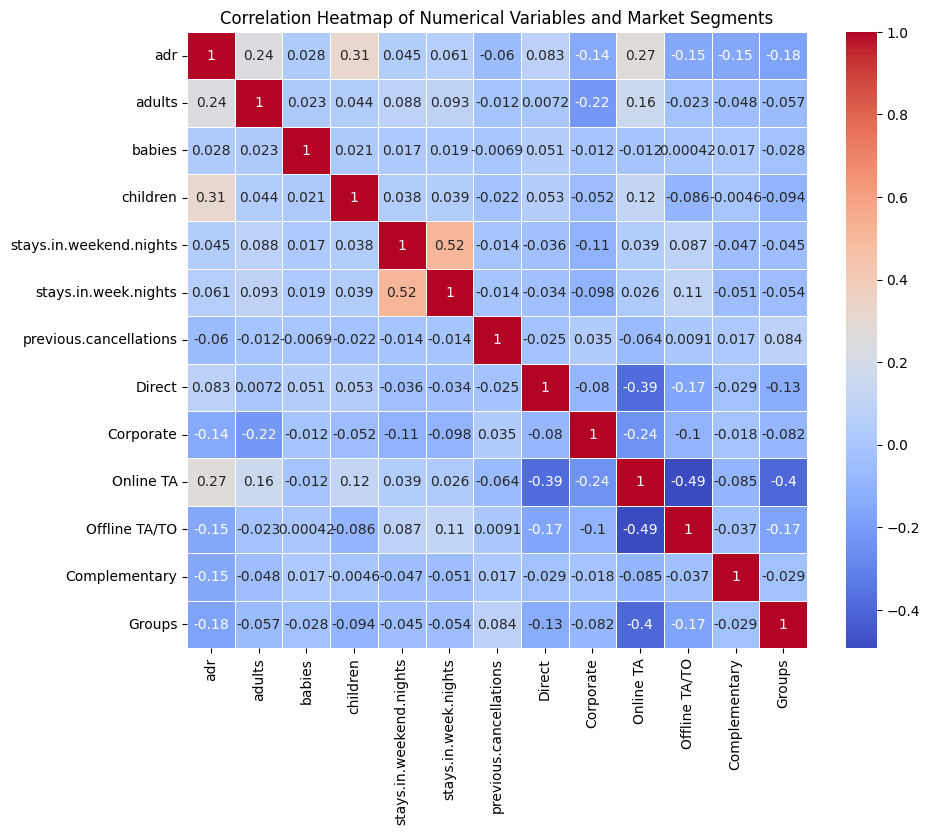

In [ ]:
# Plotting the heat map
plot.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plot.title("Correlation Heatmap of Numerical Variables and Market Segments")
plot.show()

**Highly correlated feature**

**stays.in.weekend.nights and stays.in.week.nights (0.52) :**  these two variables have the highest correlation of 0.52, this suggests that guests who stay for more nights during the week are more likely to stay for more weekend nights as well.

**adr and children (0.31):** the moderately higher correlation between adr and chilren suggests that families with more children tend to pay a higher adr or they may book rooms with a higher adr to accomodate the children

**Online TA(market segment) vs adr:** we can see a moderately higher correlation between these two as compared to other market segments which tells us that bookings made through online TA slightly push up the adr as compared to bookings through other segments.

Even though stays.in.weekend.nights and stays.in.week.nights have high correlation, we will still not remove either as it is important for the hotel to analyze the trend in both to target different types of guests, e.g, week night stays might be important for business trips etc.

# **5) Hypothesis Testing**

We will be performing hypothesis testing on these columns: market.segment, customer.type, adr.

we have selected these so we can study the average daily rate across different types of customers and market segments so that the hotel can design their pricing strategies according to that.

**market segment:**

null hypothesis (H0): there is no difference in the mean adr across different market segments

alternative hypothesis (H1): at least one group mean of adr is different across the market segments.

In [ ]:
print(hotel_data['market.segment'].unique())


['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
#ANOVA for MARKET SEGMENT
model = ols('adr ~ C(Q("market.segment"))', data=hotel_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Market Segment:")
print(anova_table)
# Check for significance
if anova_table['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found among market segments.\n")
else:
    print("\nNo significant differences among market segments.\n")

ANOVA Results for Market Segment:
                              sum_sq        df            F  PR(>F)
C(Q("market.segment"))  3.814627e+07       7.0  2335.133345     0.0
Residual                2.568758e+08  110073.0          NaN     NaN

Significant differences found among market segments.



<ipython-input-102-b6eb9db71fa6>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


**Hypothesis testing for customer type**

null hypothesis (H0): There is no difference in the mean adr across different types of customer.


alternative hypothesis (H1): at least one group mean of adr is different across the types of customers.

In [ ]:
#ANOVA for CUSTOMER TYPE
model = ols('adr ~ C(Q("customer.type"))', data=hotel_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Customer Type:")
print(anova_table)
# Check for significance
if anova_table['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found among customer types.\n")
else:
    print("\nNo significant differences among customer types.\n")

ANOVA Results for Customer Type:
                             sum_sq        df          F  PR(>F)
C(Q("customer.type"))  8.032576e+06       4.0  770.23199     0.0
Residual               2.869895e+08  110076.0        NaN     NaN

Significant differences found among customer types.



<ipython-input-103-5d5d9f7d3aba>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [ ]:
#ANOVA for CUSTOMER TYPE
model = ols('adr ~ C(Q("hotel"))', data=hotel_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Hotel:")
print(anova_table)
# Check for significance
if anova_table['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found among type of hotels.\n")
else:
    print("\nNo significant differences among customer type of hotels.\n")

ANOVA Results for Hotel:
                     sum_sq        df            F         PR(>F)
C(Q("hotel"))  2.993006e+06       1.0  1128.200014  4.354838e-246
Residual       2.920290e+08  110079.0          NaN            NaN

Significant differences found among type of hotels.



<ipython-input-104-512d02b4e2bf>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [ ]:
#ANOVA for CUSTOMER TYPE
model = ols('adr ~ C(Q("country"))', data=hotel_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Country:")
print(anova_table)
# Check for significance
if anova_table['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found among different countries.\n")
else:
    print("\nNo significant differences among customer different countries.\n")

ANOVA Results for Country:
                       sum_sq        df          F  PR(>F)
C(Q("country"))  1.318461e+07     176.0  29.212549     0.0
Residual         2.818374e+08  109904.0        NaN     NaN

Significant differences found among different countries.



<ipython-input-105-500c63ac3670>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [ ]:
#ANOVA for CUSTOMER TYPE
model = ols('adr ~ C(Q("assigned.room.type"))', data=hotel_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Hotel:")
print(anova_table)
# Check for significance
if anova_table['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found among different room types.\n")
else:
    print("\nNo significant differences among customer different room types.\n")

ANOVA Results for Hotel:
                                  sum_sq        df            F  PR(>F)
C(Q("assigned.room.type"))  3.319715e+07      11.0  1268.709723     0.0
Residual                    2.618249e+08  110069.0          NaN     NaN

Significant differences found among different room types.



<ipython-input-106-ccfedfc5007f>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=hotel_data['adr'],
                          groups=hotel_data['hotel'],
                          alpha=0.05)

#display results
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
City Hotel Resort Hotel -10.9169   0.0 -11.5539 -10.2799   True
---------------------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=hotel_data['adr'],
                          groups=hotel_data['assigned.room.type'],
                          alpha=0.05)

#display results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     A      B    0.9196 0.9995    -2.593    4.4321  False
     A      C   20.4943    0.0    17.136   23.8525   True
     A      D   14.1329    0.0   12.9454   15.3204   True
     A      E   24.2946    0.0   22.3776   26.2115   True
     A      F    58.268    0.0   55.5865   60.9495   True
     A      G   72.8227    0.0   69.6041   76.0412   True
     A      H   77.7482    0.0    71.734   83.7623   True
     A      I  -52.8124    0.0  -61.2013  -44.4236   True
     A      K  -40.2318    0.0  -49.8116   -30.652   True
     A      L  -85.6562 0.8416 -245.0454    73.733  False
     A      P  -93.6562    0.0 -139.6718  -47.6407   True
     B      C   19.5747    0.0   14.7957   24.3537   True
     B      D   13.2133    0.0    9.6118   16.8149   True
     B      E    23.375    0.0   19.4718   27.2783   True
     B      F 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=hotel_data['adr'],
                          groups=hotel_data['country'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   ABW    AGO  -11.1553    1.0 -174.2916 151.9811  False
   ABW    AIA    136.66    1.0 -145.1188 418.4388  False
   ABW    ALB  -43.9867    1.0 -219.7066 131.7333  False
   ABW    AND   74.3129    1.0 -110.1547 258.7804  False
   ABW    ARE    7.2249    1.0 -158.6194 173.0692  False
   ABW    ARG  -10.5784    1.0 -174.0219 152.8651  False
   ABW    ARM  -28.3525    1.0   -210.24  153.535  False
   ABW    ASM    -56.27    1.0 -338.0488 225.5088  False
   ABW    ATA      5.91    1.0 -224.1615 235.9815  False
   ABW    ATF     -2.34    1.0 -284.1188 279.4388  False
   ABW    AUS  -11.3219    1.0 -174.3948  151.751  False
   ABW    AUT  -21.6668    1.0 -184.4875 141.1539  False
   ABW    AZE  -13.9841    1.0 -185.9729 158.0047  False
   ABW    BDI    -82.34    1.0 -364.1188 199.4388  False
   ABW    BEL   -14.138    1.0 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=hotel_data['adr'],
                          groups=hotel_data['market.segment'],
                          alpha=0.05)

#display results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
     Aviation Complementary  -97.3116    0.0 -108.8149 -85.8082   True
     Aviation     Corporate  -30.9919    0.0  -41.2538   -20.73   True
     Aviation        Direct   14.8145 0.0003    4.6747  24.9543   True
     Aviation        Groups  -21.7895    0.0  -31.9247 -11.6544   True
     Aviation Offline TA/TO  -14.3151 0.0005  -24.4262   -4.204   True
     Aviation     Online TA   15.7321 0.0001     5.658  25.8061   True
     Aviation     Undefined  -84.9985 0.2054 -189.0177  19.0207  False
Complementary     Corporate   66.3197    0.0   60.3707  72.2687   True
Complementary        Direct  112.1261    0.0  106.3903 117.8618   True
Complementary        Groups    75.522    0.0   69.7945  81.2496   True
Complementary Offline TA/TO   82.9965    0.0   77.3117  88.6813   True
Comple

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=hotel_data['adr'],
                          groups=hotel_data['customer.type'],
                          alpha=0.05)

#display results
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------
       Contract           Group  -4.4956 0.3255 -11.0022    2.011  False
       Contract       Transient  18.4492    0.0  16.0017  20.8967   True
       Contract Transient-Party  -3.2461 0.0058  -5.8424  -0.6498   True
       Contract         Unknown   12.989    0.0  10.2675  15.7106   True
          Group       Transient  22.9448    0.0  16.8736  29.0161   True
          Group Transient-Party   1.2495 0.9813  -4.8833   7.3823  False
          Group         Unknown  17.4846    0.0  11.2978  23.6715   True
      Transient Transient-Party -21.6953    0.0 -22.8203 -20.5704   True
      Transient         Unknown  -5.4602    0.0    -6.85  -4.0704   True
Transient-Party         Unknown  16.2351    0.0  14.5974  17.8728   True
---------------------------------------------------

As we can see, the different customer types are mostly different from one another as we reject most of them since p-value is way less than alpha.

We see the same with market segment where there are more values hence more pairs we need to differentiate between.

The countries however remain relatively the same ie they charge the same hence their means do not vary significantly and so the null hypotheses is not rejected.

# **6) Cluster Analysis**

In [ ]:
hotel_data_numericals=hotel_data.drop(columns=['reservation.status.date','arrival.date'])


In [ ]:
hotel_data_numericals=pd.get_dummies(hotel_data_numericals)
hotel_data_numericals.corr()


,lead.time,arrival.date.year,arrival.date.day.of.month,stays.in.weekend.nights,stays.in.week.nights,adults,children,babies,is.repeated.guest,previous.cancellations,...,deposit.type_No Deposit,deposit.type_Non Refund,deposit.type_Refundable,customer.type_Contract,customer.type_Group,customer.type_Transient,customer.type_Transient-Party,customer.type_Unknown,reservation.status_Canceled,reservation.status_Check-Out
lead.time,1.000000,0.069377,0.005595,0.119888,0.194899,0.111261,-0.019178,-0.016894,-0.124013,0.070526,...,-0.327651,0.327393,0.020314,0.055594,-0.030145,-0.148712,0.146701,0.019186,0.253861,-0.253861
arrival.date.year,0.069377,1.000000,-0.003560,0.018131,0.024292,0.034686,0.049318,-0.015683,0.014743,-0.103674,...,0.058587,-0.058832,-0.001059,-0.155214,-0.011601,0.174008,-0.137703,-0.003183,0.037951,-0.037951
arrival.date.day.of.month,0.005595,-0.003560,1.000000,-0.017397,-0.028049,0.000137,0.012300,-0.000395,-0.005229,-0.023267,...,-0.001040,-0.003100,0.031212,-0.014741,-0.000932,0.000833,0.004404,0.001790,-0.001141,0.001141
stays.in.weekend.nights,0.119888,0.018131,-0.017397,1.000000,0.515314,0.088076,0.038445,0.016924,-0.092610,-0.013625,...,0.087146,-0.088070,0.001727,0.104470,-0.009259,0.014183,-0.056102,-0.008718,0.020615,-0.020615
stays.in.week.nights,0.194899,0.024292,-0.028049,0.515314,1.000000,0.092970,0.039481,0.019145,-0.101495,-0.013582,...,0.069256,-0.070759,0.006988,0.136310,-0.017762,0.001609,-0.055879,-0.005942,0.040697,-0.040697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer.type_Transient,-0.148712,0.174008,0.000833,0.014183,0.001609,0.080091,0.079878,0.019764,0.022470,-0.022711,...,-0.041681,0.047955,-0.044538,-0.262226,-0.102416,1.000000,-0.677746,-0.505055,0.095214,-0.095214
customer.type_Transient-Party,0.146701,-0.137703,0.004404,-0.056102,-0.055879,-0.112005,-0.079364,-0.018609,-0.031584,0.015122,...,0.074863,-0.082235,0.050793,-0.081973,-0.032015,-0.677746,1.000000,-0.157882,-0.109440,0.109440
customer.type_Unknown,0.019186,-0.003183,0.001790,-0.008718,-0.005942,-0.000880,-0.012153,-0.006682,-0.002725,0.003031,...,-0.032566,0.032704,0.000883,-0.061086,-0.023858,-0.505055,-0.157882,1.000000,0.016488,-0.016488
reservation.status_Canceled,0.253861,0.037951,-0.001141,0.020615,0.040697,0.063813,0.021859,-0.028842,-0.084169,0.099655,...,-0.409579,0.413747,-0.007851,-0.030583,-0.035631,0.095214,-0.109440,0.016488,1.000000,-1.000000


We find the covariance to see how much each value affects the other.

In [ ]:
hotel_data_numericals.cov()

,lead.time,arrival.date.year,arrival.date.day.of.month,stays.in.weekend.nights,stays.in.week.nights,adults,children,babies,is.repeated.guest,previous.cancellations,...,deposit.type_No Deposit,deposit.type_Non Refund,deposit.type_Refundable,customer.type_Contract,customer.type_Group,customer.type_Transient,customer.type_Transient-Party,customer.type_Unknown,reservation.status_Canceled,reservation.status_Check-Out
lead.time,9488.642343,4.772314,4.796153,11.771209,37.066410,5.951905,-0.746848,-0.166940,-2.177459,5.000649,...,-8.862036,8.788750,0.073236,0.934790,-0.203262,-6.732745,5.427660,0.573557,11.702930,-11.702930
arrival.date.year,4.772314,0.498686,-0.022121,0.012906,0.033493,0.013452,0.013924,-0.001124,0.001877,-0.053291,...,0.011488,-0.011449,-0.000028,-0.018920,-0.000567,0.057112,-0.036935,-0.000690,0.012683,-0.012683
arrival.date.day.of.month,4.796153,-0.022121,77.442216,-0.154314,-0.481922,0.000664,0.043274,-0.000353,-0.008294,-0.149038,...,-0.002540,-0.007518,0.010166,-0.022392,-0.000568,0.003405,0.014721,0.004834,-0.004751,0.004751
stays.in.weekend.nights,11.771209,0.012906,-0.154314,1.015991,1.014114,0.048754,0.015492,0.001731,-0.016826,-0.009996,...,0.024390,-0.024464,0.000064,0.018177,-0.000646,0.006644,-0.021478,-0.002697,0.009834,-0.009834
stays.in.week.nights,37.066410,0.033493,-0.481922,1.014114,3.811880,0.099683,0.030817,0.003792,-0.035718,-0.019302,...,0.037545,-0.038072,0.000505,0.045939,-0.002400,0.001460,-0.041438,-0.003560,0.037604,-0.037604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer.type_Transient,-6.732745,0.057112,0.003405,0.006644,0.001460,0.020443,0.014842,0.000932,0.001882,-0.007683,...,-0.005379,0.006142,-0.000766,-0.021038,-0.003295,0.216017,-0.119643,-0.072041,0.020943,-0.020943
customer.type_Transient-Party,5.427660,-0.036935,0.014721,-0.021478,-0.041438,-0.023363,-0.012051,-0.000717,-0.002162,0.004181,...,0.007895,-0.008608,0.000714,-0.005374,-0.000842,-0.119643,0.144263,-0.018404,-0.019672,0.019672
customer.type_Unknown,0.573557,-0.000690,0.004834,-0.002697,-0.003560,-0.000148,-0.001491,-0.000208,-0.000151,0.000677,...,-0.002775,0.002766,0.000010,-0.003236,-0.000507,-0.072041,-0.018404,0.094187,0.002395,-0.002395
reservation.status_Canceled,11.702930,0.012683,-0.004751,0.009834,0.037604,0.016585,0.004136,-0.001385,-0.007180,0.034330,...,-0.053821,0.053962,-0.000138,-0.002498,-0.001167,0.020943,-0.019672,0.002395,0.223971,-0.223971


In [ ]:
from sklearn.decomposition import PCA

We take 2 components as requested in the question

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(hotel_data_numericals)
principaldf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
principaldf.head()

,pc1,pc2
0,248.346528,-95.617850
1,643.165281,-83.866167
2,-88.728208,-30.623955
3,-82.729651,-30.450585
4,-82.410047,-7.416956


This shows us how much of the variance is explained by these two values

In [ ]:
pca.explained_variance_ratio_

array([0.77436582, 0.21810634])

In [ ]:
principaldf.cov().round(4)

,pc1,pc2
pc1,9494.9867,0.0000
pc2,0.0000,2674.3391


This graph shows how much variance is covered as you raise the number of components

Text(0, 0.5, 'cumulative explained variance')

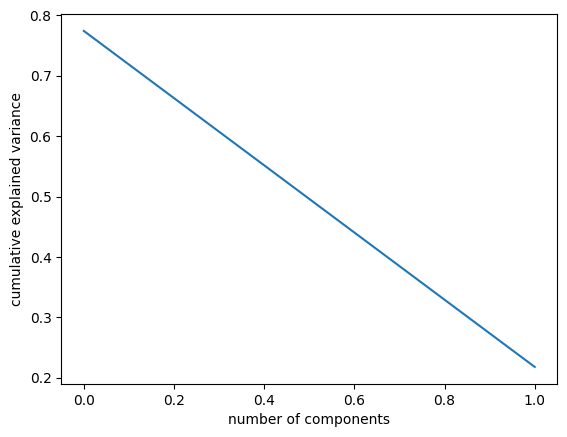

In [ ]:
plot.plot(pca.explained_variance_ratio_)
plot.xlabel('number of components')
plot.ylabel('cumulative explained variance')


In [ ]:
scores_pca = pca.transform(hotel_data_numericals)

In [ ]:
from sklearn.cluster import KMeans



In [ ]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

This plot shows us how many clusters can be found via the PCA scores we obtained.

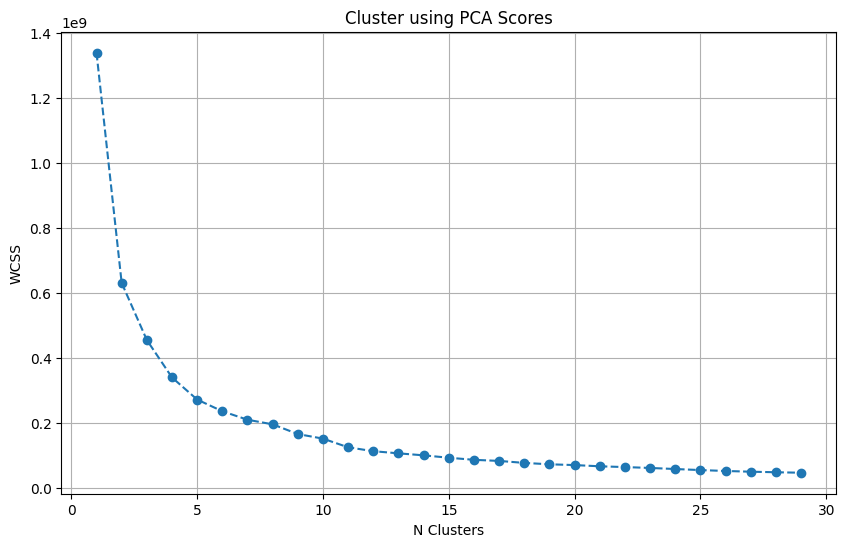

In [ ]:
plot.figure(figsize = (10,6))
plot.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plot.grid()
plot.title("Cluster using PCA Scores")
plot.ylabel("WCSS")
plot.xlabel("N Clusters")
plot.show()

In [ ]:
principaldf['cluster'] = kmeans_pca.labels_

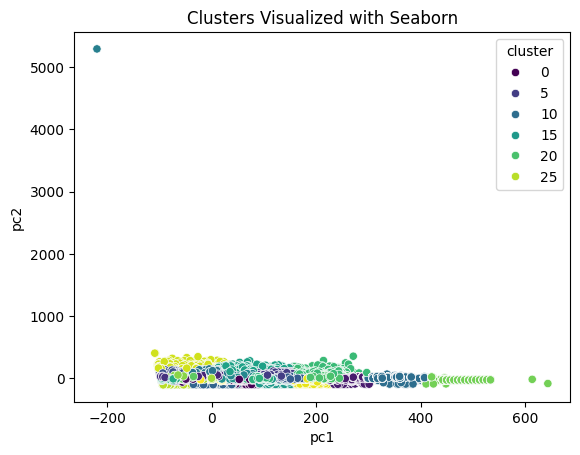

In [ ]:
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=principaldf, palette='viridis')
plot.title('Clusters Visualized with Seaborn')
plot.show()

As we see above, the clusters are very close together but that is mostly because there is an outlier on the far left corner

In [ ]:
centroids = kmeans_pca.cluster_centers_

In [ ]:

num_clusters = kmeans_pca.n_clusters

# Assuming you have 6 clusters, adjust if different
categories = ['pc1', 'pc2']

# Create a list of cluster labels
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create a list of angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Close the plot to form a circle
angles = np.concatenate((angles, [angles[0]]))